# Image segmentation by adaptive methods

## Метод Оцу (дискриминантный DTSM).

Гистограмма интенсивностей пикселей изображения $H(b), b = 0,L - 1$. $t$ - порог, который делит изображение $I(i,j)$ на два класса:

$I_0$ - фон, включающий точки $(i,j)$, для которых $I(i,j) \leq t$,

$I_1$ - объект, включающий точки $(i,j)$, для которых $I(i,j) \geq t$.

Предварительно проведем нормировку гистограммы $H(b) = \frac{H(b)}{\sum\limits_{b=0}^{L-1}H(b)}$, таким образом $\sum\limits_{b=0}^{L-1}H(b) = 1$.

Вероятность принадлежности наугад взятого пикселя для фона:

$\omega_0(t)=\sum\limits_{b=0}^{t}H(b)$ 

Вероятность принадлежности наугад взятого пикселя для объекта:

$\omega_1(t)=\sum\limits_{b=t+1}^{L-1}H(b) = 1 - \omega_0(t)$.

Оценка средних уровней яркостей для фона и объекта найдутся соответсвенно:

$\mu_0(t) = \sum\limits_{b=0}^{t}\frac{b H(b)}{\omega_0(t)}$,
$\mu_1(t) = \sum\limits_{b=t+1}^{L-1}\frac{b H(b)}{\omega_1(t)}$.

Cредний уровень яркости исходного изображения составит:

$\mu(t) = \sum\limits_{b=0}^{L-1}b H(b)$.

Очевидно, что для любого порога t справедлива формула:

$\omega_0(t)\mu_0(t) + \omega_1(t)\mu_1(t) = \mu$

Оценки дисперсий яркостей фона и объекта вычисляются по формулам:

$\sigma_0^2(t) = \sum\limits_{b=0}^{t}\frac{(b - \mu_0(t))^2 H(b)}{\omega_0(t)}$,
$\sigma_1^2(t) = \sum\limits_{b=t+1}^{L-1}\frac{(b - \mu_1(t))^2 H(b)}{\omega_1(t)}$.

Внутриклассовая дисперсия определяется формулой:

$\sigma_{Within}^2(t) = \omega_0(t)\sigma_0^2(t) + \omega_1(t)\sigma_1^2(t)$

Межклассовая дисперсия определяется формулой:

$\sigma_{Between}^2(t) = \sigma^2 - \sigma_{Within}^2(t) = \omega_0(t)(\mu_0(t) - \mu)^2 + \omega_1(t)(\mu_1(t) - \mu)^2 = \omega_0(t)\omega_1(t)(\mu_0(t) - \mu_1(t))^2$,

где $\sigma^2 = \sum\limits_{b=0}^{L-1}(b-\mu)^2 H(b) = \sigma_{Between}^2(t) + \sigma_{Within}^2(t)$ - полная дисперсия.

Метод Оцу ищет порог, уменьшающий дисперсию внутри класса, которая, как показано выше, определяется как взвешенная сумма дисперсий двух классов. Необходимо отметить, что такой способ вычислительно затратный, так как требуется выичсление дисперсий $\sigma_0^2(t)$ и $\sigma_0^2(t)$.
Оцу показал, что минимизация внутриклассовой дисперсии равносильна максимизации межклассовой дисперсии, так полная дисперсия - постоянная величина и не зависит от порога. Для расчета межклассовой дисперсии необходимы только средние значения $\mu$, которые являются более простыми с точки зрения вычислений. 

### Алгоритм
1. Вычисляем гистограмму изображения и нормируем ее.
2. На основе гистограммы вычисляем значения $\omega_0(t)$, $\omega_1(t)$, $\mu_0(t)$ и $\mu_1(t)$ для каждого порога $t = 0, L-1$
3. Вычисляем $\sigma_{Between}^2(t)$ для $t=0, L-1$.
4. Находим максимальное значение $\sigma_{Between}^2(t)$, выбираем порог $t$ соответствующий максимальному значению.

In [156]:
from skimage.io import imread, imshow
from skimage import img_as_ubyte
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


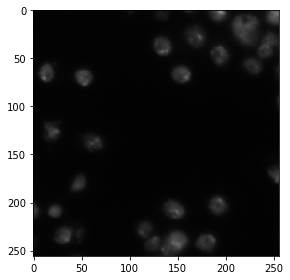

In [157]:
i1 = imread('nucklea.png', as_grey=True)
imshow(i1)
i1 = img_as_ubyte(i1)

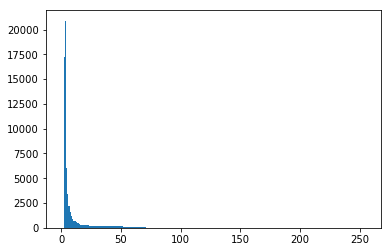

In [158]:
H = plt.hist(i1.ravel(), bins=256, range=[0, 255]);

In [159]:
H1 = np.uint32(sum(H[0]))
H = H[0].astype('uint32') / H1
H.sum()

1.0

In [160]:
w0 = np.zeros(256)
for t in range(0, 255):
    for b in range(0, t):
        w0[t] = w0[t] + H[b]

In [161]:
w1 = np.zeros(256)
for t in range(0, 255):
    for b in range(t + 1, 255):
        w1[t] = w1[t] + H[b]

In [162]:
m0 = np.zeros(256)
for t in range(0, 255):
    for b in range(0, t):
        m0[t] = m0[t] + (b * H[b] / w0[t])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


In [163]:
m1 = np.zeros(256)
for t in range(0, 255):
    for b in range(t + 1, 255):
        m1[t] = m1[t] + (b * H[b] / w1[t])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


In [164]:
between = np.zeros(256)
for t in range(0, 255):
    between[t] = w0[t] * w1[t] * ((m0[t] - m1[t])**2)

In [165]:
m = between[0]
pos = 0
for t in range(0, 255):
    if between[t] > m:
        m = between[t];
        pos = t

In [166]:
pos

25

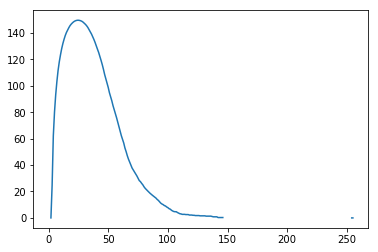

In [167]:
plt.plot(between)

C:\ProgramData\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


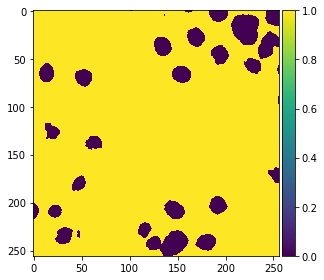

In [168]:
for i in range(0, i1.shape[0]):
    for j in range(0, i1.shape[1]):
        if i1[i][j] > pos:
            i1[i][j] = 0
        else:
            i1[i][j] = 1
imshow(i1)